<a href="https://colab.research.google.com/github/xslittlemaggie/probability-statistics-problems/blob/master/Expectation_of_tossing_unbiased_dice_1_or_more_times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the expectation of tossing an unbiased dice 1, 2, 3, or more times

In [0]:
import random
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

## Part 1: Calculation of the expections

### Step 1: The strategy - stop when tossing 1 or above

In this case, it means the player will stop no matter what he/she gets at the first round. 

The expectation = **3.5**

In [4]:
expectation = 1/6 * (1 + 2 + 3 + 4 + 5 + 6)
expectation

3.5

### Step 2: The strategy - stop when tossing 2 or above

In this case, there are two conditions:

- get 1 at the first round p(1) = 1/6
  - get 1 at the second round p(1) = 1/6
    - no matter what value at the thid round, then stop: The exp = 1/6 * 1/6 * 1/6 * (1 + 2 + 3 + 4 + 5 + 6) = **0.0972**
  - get 2 + at the second round, then stop:  The exp = 1/6 * 1/6 * (2 + 3 + 4 + 5 + 6) = **0.5555**
  
- get 2 or above at the first round, then stop: The exp = p(2 + ) = 1/6 * (2 + 3 + 4 + 5 + 6) = **3.33333**


The expectation = **3.9861111111111107**

### Step 3: The strategy - stop when tossing 3 or above

In this case, there are two conditions:

- get 1 or 2 at the first round p(1 or 2) = 2/6
  - get 1 or 2 at the second round p(1 or 2) = 2/6
    - no matter what value at the thid round, then stop: The exp = 2/6 * 2/6 * 1/6 * (1 + 2 + 3 + 4 + 5 + 6) = **0.3888**
  - get 2 + at the second round, then stop:  The exp = 2/6 * 1/6 * (3 + 4 + 5 + 6) = **1.0**
  
- get 3 or above at the first round, then stop: The exp = p(3 + ) = 1/6 * (3 + 4 + 5 + 6) = **3.0**


The expectation = **4.388888888888889**

### Step 4: The strategy - stop when tossing 4 or above

In this case, there are two conditions:

- get 1, 2 or 3 at the first round p(1 or 2 or 3) = 3/6
  - get 1, 2 or 3 at the second round p(1 or 2 or 3) = 3/6
    - no matter what value at the thid round, then stop: The exp = 3/6 * 3/6 * 1/6 * (1 + 2 + 3 + 4 + 5 + 6) = **0.875**
  - get 4 + at the second round, then stop:  The exp = 3/6 * 1/6 * (4 + 5 + 6) = **1.25**
  
- get 4 or above at the first round, then stop: The exp = p(4 + ) = 1/6 * (4 + 5 + 6) = **2.5**


The expectation = **4.625**

### Step 5: The strategy - stop when tossing 5 or above

In this case, there are two conditions:

- get 1, 2, 3, or 4 at the first round p(1 or 2 or 3 or 4) = 4/6
  - get 1, 2, 3, or 4 at the second round p(1 or 2 or 3 or 4) = 4/6
    - no matter what value at the thid round, then stop: The exp = 4/6 * 4/6 * 1/6 * (1 + 2 + 3 + 4 + 5 + 6) = **0.875**
  - get 5 + at the second round, then stop:  The exp = 4/6 * 1/6 * (5 + 6) = **1.2222**
  
- get 5 or above at the first round, then stop: The exp = p(4 + ) = 1/6 * (5 + 6) = **1.83**


The expectation = **4.611111111111111**

### Step 6: The strategy - stop when tossing 6

In this case, there are two conditions:

- get 1, 2, 3, 4 or 5 at the first round p(1 or 2 or 3 or 4 or 4) = 5/6
  - get 1, 2, 3, 4 or 5 at the second round p(1 or 2 or 3 or 4 or 5) = 5/6
    - no matter what value at the thid round, then stop: The exp = 5/6 * 5/6 * 1/6 * (1 + 2 + 3 + 4 + 5 + 6) = **2.43**
  - get 6 at the second round, then stop:  The exp = 5/6 * 1/6 * (6) = **0.8333**
  
- get 6 at the first round, then stop: The exp = p(6) = 1/6 * (6) = **1**

The expectation = **4.263888888888889**



## Part 2: Simulation

In [0]:
def unbiased_dice():
  return random.choice(range(1, 7))

### 2.1 Check whether the dice is unbiased with simulation

3.49849


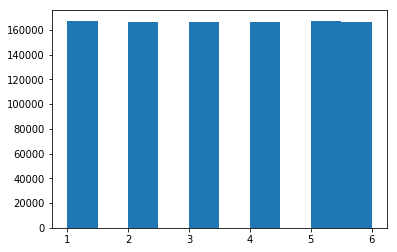

In [18]:
res = [unbiased_dice() for i in range(1000000)]
print(np.mean(res))
plt.hist(res)
plt.show()

### 2.2 check the simulated results of the expectation

In [0]:
def player(n, k = 3): # k indicates the number of playing
  i = 1
  while i < k:
    val = unbiased_dice()
    if val >= n:
      #return(i)
      return val
    
    elif val < n:
      i += 1
      val = unbiased_dice()
  if i == k:
    #return(i)
    return unbiased_dice()

In [29]:
Counter([player(3, k = 3) for i in range(10000)])

Counter({1: 179, 2: 191, 3: 2389, 4: 2396, 5: 2457, 6: 2388})

[3.499, 3.985536, 4.388751, 4.625408, 4.610778, 4.262862]


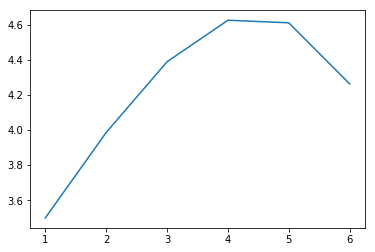

In [30]:
def simulaiton(n):
  res_1 = np.mean([player(1) for i in range(n)])
  res_2 = np.mean([player(2) for i in range(n)])
  res_3 = np.mean([player(3) for i in range(n)])
  res_4 = np.mean([player(4) for i in range(n)])
  res_5 = np.mean([player(5) for i in range(n)])
  res_6 = np.mean([player(6) for i in range(n)])
  print([res_1, res_2, res_3, res_4, res_5, res_6])
  plt.plot([1, 2, 3, 4, 5, 6], [res_1, res_2, res_3, res_4, res_5, res_6])
  
  plt.show()
simulaiton(1000000)

## Part 3: simulation when tossing different number of times

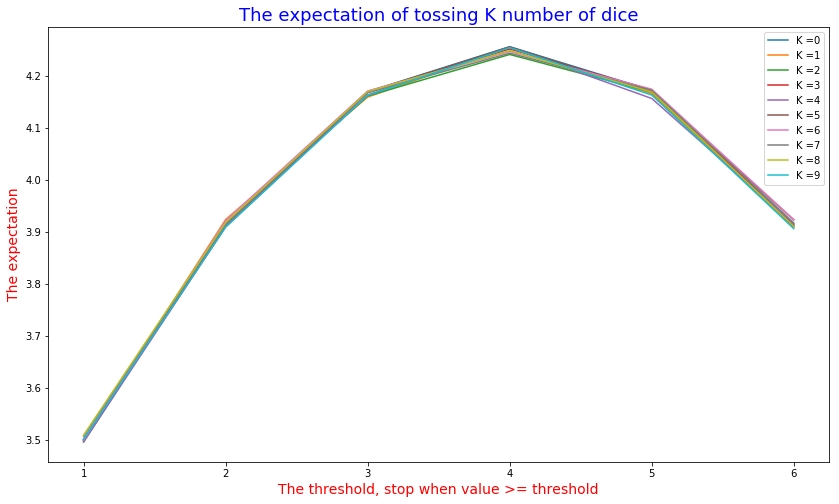

In [65]:
n = 100000
plt.figure(figsize = (14, 8))
for i in range(10):
  player(n, k = i)
  plt.plot([1, 2, 3, 4, 5, 6], simulaiton(n), label = "K =" + str(i))
  plt.legend()
plt.title("The expectation of tossing K number of dice", size = 18, color = "blue")
plt.ylabel("The expectation", size = 14, color = "red")
plt.xlabel("The threshold, stop when value >= threshold", size = 14, color = "red")
plt.show()

Thus, from the result, the largest expectation is about 4.26 when threshold = 4, and the smallest expectation is about 3.5 when threshold = 1

More probability problems
url_1 = "https://www.zhihu.com/question/62404167"

url_2 = "https://blog.csdn.net/beiyeqingteng/article/details/7539366" **dice**

url_3 = "https://blog.csdn.net/hilyoo/article/details/4445858"

url_4 = "https://blog.csdn.net/dengm155/article/details/52660320"

url_5 = "https://www.33iq.com/topic/9589/0/"经典🎲问题

url_ 6 = "https://www.matrix67.com/blog/archives/6665"